# ENTROPY

## Step 0: We import the database as well as the required libraries 

In [113]:
import numpy as np
from scipy.stats import entropy
from math import log, e
import pandas as pd
import math
import matplotlib.pyplot as plt
from fpdf import FPDF

In [114]:
dataFF = pd.read_csv('dataFF.csv')

## Step 1: We create a function to calculate the entropy 

In [115]:
def calc_entropy(column):
    counts = np.bincount(column)
    probability = counts / len(column)
    entropy = 0
    for prob in probability:
        if prob > 0:
            entropy += prob * math.log(prob, 2)

    n = len(counts)
    max_entropy = math.log2(n)  # Maximal Entropy
    
    # Normalize entropy
    normalized_entropy = -entropy / max_entropy if max_entropy > 0 else 0

    return normalized_entropy

In [116]:
dataFF.columns

Index(['Unnamed: 0', 'Doctor Name', 'Specialty', 'Profile Cards', 'card_0',
       'card_3', 'card_4', 'Latitude', 'Longitude', 'Skills Processed', 'RPPS',
       'Nb Skills', 'moyens_paiement', 'carte_vitale', 'secteur',
       'Présentation', 'Langues parlées',
       'Diplômes nationaux et universitaires', 'Autres formations',
       'Expériences', 'Travaux et publications', 'Prix et distinctions',
       'site', 'Site web', 'Formations',
       'Diplômes nationaux et universitaires b', 'Nb caractères présentation',
       'Autres formations b', 'Travaux et publications b', 'Nb langues',
       'Expériences b', 'Formations b', 'Carac_card_1', 'Transport', 'Parking',
       'Infos', 'Coordonnées', 'Sans RDV', 'Nb_prix', 'Prix_min', 'Prix_max',
       'nb terms card_0', 'nb terms card_3', 'nb terms card_4',
       'nb carac card_0', 'nb carac card_3', 'nb carac card_4', 'Code commune',
       'Code commune2', 'Code Insee', 'Population totale',
       'Population standardisée par la co

In [117]:
dataFF.drop(columns= ['Unnamed: 0'],inplace=True)

## Step 2: We create a dictionary to gather all the entropy of the targeted columns 

In [118]:
liste_var = ['Nb Skills', 'moyens_paiement',
       'carte_vitale', 'secteur',
       'site',
       'Diplômes nationaux et universitaires b', 'Nb caractères présentation',
       'Autres formations b','Travaux et publications b','Nb langues', 'Expériences b', 'Carac_card_1',
       'Transport', 'Parking', 'Infos', 'Coordonnées', 'Formations b',
       'nb terms card_0', 'nb terms card_3', 'nb terms card_4',
       'nb carac card_0', 'nb carac card_3', 'nb carac card_4','APL']
entropy={}
for nom_colonne in liste_var : 
    entropy[nom_colonne]=calc_entropy(dataFF[nom_colonne])
print(entropy)

{'Nb Skills': 0.720212645797775, 'moyens_paiement': 0.7359703016368857, 'carte_vitale': 0.7359703016368857, 'secteur': 0.5721328976148156, 'site': 0.4433770112265818, 'Diplômes nationaux et universitaires b': 0.9991104040651708, 'Nb caractères présentation': 0.44134368610633545, 'Autres formations b': 0.5072300550463475, 'Travaux et publications b': 0.07130531891840033, 'Nb langues': 0.5908078865567339, 'Expériences b': 0.3069080882905436, 'Carac_card_1': 0.8959305632300992, 'Transport': 0.9969503324015179, 'Parking': 0.8298197410779284, 'Infos': 0.5465718513450784, 'Coordonnées': 0.8947325262979942, 'Formations b': 0.46101131706097553, 'nb terms card_0': 0.7986952626573008, 'nb terms card_3': 0.5958459879342737, 'nb terms card_4': 0.500404945408242, 'nb carac card_0': 0.40347597354508524, 'nb carac card_3': 0.30422340191243197, 'nb carac card_4': 0.25124662763986666, 'APL': 0.6850294456532086}


In [119]:
liste_var_descri=['Nb Skills', 'moyens_paiement',
       'carte_vitale', 'secteur',
       'site',
       'Diplômes nationaux et universitaires b', 'Nb caractères présentation',
       'Autres formations b','Travaux et publications b','Nb langues', 'Expériences b', 'Carac_card_1',
       'Transport', 'Parking', 'Infos', 'Coordonnées', 'Sans RDV', 'Formations b',
       'nb terms card_0', 'nb terms card_3', 'nb terms card_4',
       'nb carac card_0', 'nb carac card_3', 'nb carac card_4','Nb_doct_2km','Nb_doct_8km','Nb_doct_30km','Nb_doct_f_2km','Nb_doct_f_8km','Nb_doct_f_30km','Nb_doct_D_2km','Nb_doct_D_8km','Nb_doct_D_30km','Nb_doct_f_D_2km','Nb_doct_f_D_8km','Nb_doct_f_D_30km','APL','Fibre','share_Doctolib']

## Step 3: We check the value of the targeted columns 

In [120]:
print(dataFF[liste_var_descri].describe())

         Nb Skills  moyens_paiement  carte_vitale      secteur         site  \
count  5354.000000      5354.000000   5354.000000  5354.000000  5354.000000   
mean      1.857303         0.792865      0.792865     0.819014     0.092081   
std       2.531586         0.405291      0.405291     0.449510     0.289167   
min       0.000000         0.000000      0.000000     0.000000     0.000000   
25%       0.000000         1.000000      1.000000     1.000000     0.000000   
50%       1.000000         1.000000      1.000000     1.000000     0.000000   
75%       3.000000         1.000000      1.000000     1.000000     0.000000   
max      11.000000         1.000000      1.000000     2.000000     1.000000   

       Diplômes nationaux et universitaires b  Nb caractères présentation  \
count                             5354.000000                 5354.000000   
mean                                 0.517557                  375.201345   
std                                  0.499738            

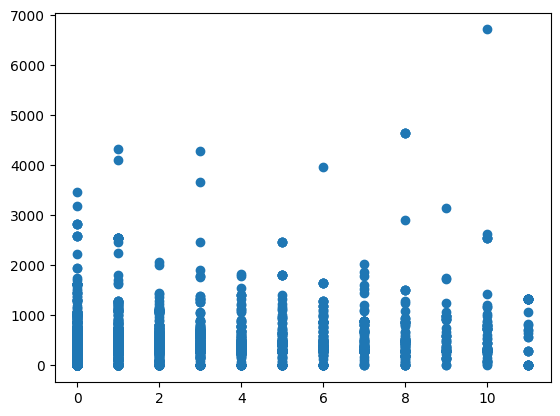

In [121]:
plt.scatter(dataFF['Nb Skills'],dataFF['Nb caractères présentation'])

## Step 4: We create a normalized dataset between 0 and 1 and a normalized dataset in a gaussian way.

In [122]:
def normalize_dataframe(df):
    normalized_df = (df - df.min()) / (df.max() - df.min())
    return normalized_df

def normalize_gauss(df,column):
    mean = df[column].mean()  # Calculate the mean
    std = df[column].std()    # Calculate standard error
    
    # Normalize the column
    normalized_column = (df[column] - mean) / std
    
    return normalized_column

liste_var_a_norm = ['Nb Skills', 'moyens_paiement',
       'carte_vitale',
       'site', 'Nb caractères présentation','Nb langues',  'Carac_card_1',
       'Transport', 'Parking', 'Coordonnées', 'Sans RDV', 
       'nb terms card_0', 'nb terms card_3', 'nb terms card_4',
       'nb carac card_0', 'nb carac card_3', 'nb carac card_4','Diplômes nationaux et universitaires b','Autres formations b','Expériences b','Formations b','Travaux et publications b']
dataFF_red = dataFF[liste_var_a_norm]
dataFF_red_norm01 = normalize_dataframe(dataFF_red)
dataFF_red_norm01 = pd.concat([dataFF_red_norm01,dataFF[['RPPS','secteur','Nb_doct_2km','Nb_doct_8km','Nb_doct_30km','Nb_doct_f_2km','Nb_doct_f_8km','Nb_doct_f_30km','Nb_doct_D_2km','Nb_doct_D_8km','Nb_doct_D_30km','Nb_doct_f_D_2km','Nb_doct_f_D_8km','Nb_doct_f_D_30km','APL','Fibre','share_Doctolib']]],axis=1)
dataFF_red_norm_gauss = dataFF[liste_var_a_norm]
for column in dataFF_red_norm_gauss.columns :
    dataFF_red_norm_gauss[column]=normalize_gauss(dataFF_red_norm_gauss,column)
dataFF_red_norm_gauss = pd.concat([dataFF_red_norm_gauss,dataFF[['RPPS','secteur','Nb_doct_2km','Nb_doct_8km','Nb_doct_30km','Nb_doct_f_2km','Nb_doct_f_8km','Nb_doct_f_30km','Nb_doct_D_2km','Nb_doct_D_8km','Nb_doct_D_30km','Nb_doct_f_D_2km','Nb_doct_f_D_8km','Nb_doct_f_D_30km','APL','Fibre','share_Doctolib']]],axis=1)

/var/folders/rf/dqdwsk6s06ngm9b4j17fkb2r0000gn/T/ipykernel_36187/411584209.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFF_red_norm_gauss[column]=normalize_gauss(dataFF_red_norm_gauss,column)


# Step 5: We verify the values of the dataset 

In [123]:
dataFF_red_norm01

,Nb Skills,moyens_paiement,carte_vitale,site,Nb caractères présentation,Nb langues,Carac_card_1,Transport,Parking,Coordonnées,...,Nb_doct_f_30km,Nb_doct_D_2km,Nb_doct_D_8km,Nb_doct_D_30km,Nb_doct_f_D_2km,Nb_doct_f_D_8km,Nb_doct_f_D_30km,APL,Fibre,share_Doctolib
0,0.909091,1.0,1.0,1.0,0.377960,0.250,0.466321,1.0,0.0,0.0,...,0.269869,0.027698,0.027698,0.027698,0.017218,0.504679,0.504679,4.1504,0.978945,0.086167
1,0.909091,1.0,1.0,1.0,0.377960,0.250,0.466321,1.0,0.0,0.0,...,0.037818,0.000347,0.001737,0.003970,0.000248,0.031267,0.068936,4.1504,0.978945,0.086167
2,0.909091,1.0,1.0,1.0,0.377960,0.250,0.466321,1.0,0.0,0.0,...,0.269869,0.027698,0.027698,0.027698,0.017218,0.504679,0.504679,1.8940,0.989444,0.125000
3,0.909091,1.0,1.0,1.0,0.377960,0.250,0.466321,1.0,0.0,0.0,...,0.037818,0.000347,0.001737,0.003970,0.000248,0.031267,0.068936,1.8940,0.989444,0.125000
4,0.090909,1.0,1.0,0.0,0.040804,0.000,0.468912,1.0,0.0,1.0,...,0.012282,0.000240,0.001199,0.001621,0.000108,0.016955,0.021123,2.2930,0.987582,0.135294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5349,0.272727,1.0,1.0,0.0,0.040060,0.000,0.533679,1.0,1.0,0.0,...,0.269869,0.027698,0.027698,0.027698,0.017218,0.504679,0.504679,4.1504,0.978945,0.086167
5350,0.272727,1.0,1.0,0.0,0.042293,0.125,0.533679,1.0,1.0,0.0,...,0.269869,0.027698,0.027698,0.027698,0.017218,0.504679,0.504679,4.1504,0.978945,0.086167
5351,0.000000,0.0,0.0,0.0,0.030827,0.250,0.419689,0.0,0.0,1.0,...,0.236173,0.000553,0.001383,0.029038,0.000277,0.010232,0.401825,3.4120,0.974766,0.153846
5352,0.000000,1.0,1.0,0.0,0.042293,0.000,0.225389,0.0,0.0,1.0,...,0.104447,0.000561,0.003176,0.018871,0.000187,0.043722,0.244955,3.8130,0.970577,0.200000


In [124]:
print(dataFF_red_norm_gauss)

      Nb Skills  moyens_paiement  carte_vitale      site  \
0      3.216442         0.511077      0.511077  3.139777   
1      3.216442         0.511077      0.511077  3.139777   
2      3.216442         0.511077      0.511077  3.139777   
3      3.216442         0.511077      0.511077  3.139777   
4     -0.338643         0.511077      0.511077 -0.318434   
...         ...              ...           ...       ...   
5349   0.451376         0.511077      0.511077 -0.318434   
5350   0.451376         0.511077      0.511077 -0.318434   
5351  -0.733652        -1.956287     -1.956287 -0.318434   
5352  -0.733652         0.511077      0.511077 -0.318434   
5353  -0.733652         0.511077      0.511077 -0.318434   

      Nb caractères présentation  Nb langues  Carac_card_1  Transport  \
0                       5.694668    0.969852      0.356221   1.067155   
1                       5.694668    0.969852      0.356221   1.067155   
2                       5.694668    0.969852      0.356221  

# Step 6: We rename the columns 

In [125]:
dataFF_red_norm01.rename(columns={'Nb Skills':'Nb_Skills','Diplômes nationaux et universitaires b':'Diplômes_nationaux_et_universitaires_b','Nb caractères présentation':'Nb_carac_présentation','Autres formations b':'Autres formations b','Travaux et publications b':'Travaux_et_publications_b','Nb langues':'Nb_langues','Expériences b':'Expériences_b','Sans RDV':'Sans_RDV','Formations b':'Formations_b','nb terms card_0':'nb_terms_card_0','nb terms card_3':'nb_terms_card_3','nb terms card_4':'nb_terms_card_4','nb carac card_0':'nb_carac_card_0','nb carac card_3':'nb_carac_card_3','nb carac card_4':'nb_carac_card_4','Autres formations b':'Autres_formations_b'},inplace=True)
dataFF_red_norm_gauss.rename(columns={'Nb Skills':'Nb_Skills','Diplômes nationaux et universitaires b':'Diplômes_nationaux_et_universitaires_b','Nb caractères présentation':'Nb_carac_présentation','Autres formations b':'Autres formations b','Travaux et publications b':'Travaux_et_publications_b','Nb langues':'Nb_langues','Expériences b':'Expériences_b','Sans RDV':'Sans_RDV','Formations b':'Formations_b','nb terms card_0':'nb_terms_card_0','nb terms card_3':'nb_terms_card_3','nb terms card_4':'nb_terms_card_4','nb carac card_0':'nb_carac_card_0','nb carac card_3':'nb_carac_card_3','nb carac card_4':'nb_carac_card_4','Autres formations b':'Autres_formations_b'},inplace=True)

# Step 7 : We create a new column to sum all the indicator in only one variable

In [126]:
dataFF_red_norm_gauss['sum']=dataFF_red_norm_gauss['Nb_Skills']+dataFF_red_norm_gauss['moyens_paiement']+dataFF_red_norm_gauss['carte_vitale']+dataFF_red_norm_gauss['site']+dataFF_red_norm_gauss['Nb_carac_présentation']+dataFF_red_norm_gauss['Nb_langues']+dataFF_red_norm_gauss['Carac_card_1']+dataFF_red_norm_gauss['Transport']+dataFF_red_norm_gauss['Parking']+dataFF_red_norm_gauss['nb_terms_card_0']+dataFF_red_norm_gauss['nb_terms_card_3']+dataFF_red_norm_gauss['nb_terms_card_4']+dataFF_red_norm_gauss['nb_carac_card_0']+dataFF_red_norm_gauss['nb_carac_card_3']+dataFF_red_norm_gauss['nb_carac_card_4']+dataFF_red_norm_gauss['Diplômes_nationaux_et_universitaires_b']+dataFF_red_norm_gauss['Autres_formations_b']+dataFF_red_norm_gauss['Expériences_b']+dataFF_red_norm_gauss['Formations_b']+dataFF_red_norm_gauss['Travaux_et_publications_b']

# Step 8: We export the two data base 

In [127]:
dataFF_red_norm01.to_csv('dataFF_red_norm01.csv')
dataFF_red_norm_gauss.to_csv('dataFF_red_norm_gauss.csv')

In [128]:
# Obtenir les statistiques descriptives
desc = dataFF[liste_var_descri].describe()

# Initialiser le PDF
pdf = FPDF()

# Ajouter une page
pdf.add_page()

# Définir la police
pdf.set_font("Arial", size=12)

# Ajouter un titre
pdf.cell(200, 10, txt="Statistiques Descriptives par Colonne (Deux Colonnes)", ln=True, align='C')

# Saut de ligne après le titre
pdf.ln(10)

# Largeur pour chaque colonne (demi-page)
column_width = pdf.w / 2 - 10  # Largeur de chaque colonne dans le PDF (avec une petite marge)

# Ajouter les statistiques par colonne, deux colonnes à la fois
columns = list(desc.columns)
for i in range(0, len(columns), 2):
    # Vérifier si la hauteur de la page est atteinte, et ajouter une nouvelle page si nécessaire
    if pdf.get_y() > 270:  # Ajuster la limite avant saut de page
        pdf.add_page()
    
    # Position de départ pour la première colonne (à gauche)
    pdf.set_x(10)  # Marge à gauche
    pdf.set_font("Arial", 'B', 12)
    pdf.cell(column_width, 10, txt=f"Colonne: {columns[i]}", ln=False)  # ln=False pour rester sur la même ligne

    # Position de départ pour la deuxième colonne (à droite), si elle existe
    if i + 1 < len(columns):
        pdf.set_x(column_width + 20)  # Marge à droite de la première colonne
        pdf.cell(column_width, 10, txt=f"Colonne: {columns[i+1]}", ln=True)  # ln=True pour passer à la ligne suivante
    else:
        pdf.ln(10)  # Si c'est la dernière colonne impaire, aller à la ligne

    # Afficher les statistiques pour les deux colonnes
    for stat_name in desc.index:
        # Première colonne (gauche)
        pdf.set_x(10)
        pdf.set_font("Arial", size=12)
        stat_value_col1 = desc.loc[stat_name, columns[i]]
        pdf.cell(column_width, 10, txt=f"{stat_name}: {stat_value_col1:.2f}", ln=False)
        
        # Deuxième colonne (droite), s'il y a une deuxième colonne
        if i + 1 < len(columns):
            pdf.set_x(column_width + 20)
            stat_value_col2 = desc.loc[stat_name, columns[i+1]]
            pdf.cell(column_width, 10, txt=f"{stat_name}: {stat_value_col2:.2f}", ln=True)
        else:
            pdf.ln(10)  # Si pas de deuxième colonne, aller à la ligne

    # Ajouter un espace vertical entre les paires de colonnes
    pdf.ln(5)

# Sauvegarder le PDF
pdf_file = "statistiques_descriptives_deux_colonnes.pdf"
pdf.output(pdf_file)

print(f"Le fichier PDF a été créé : {pdf_file}")

Le fichier PDF a été créé : statistiques_descriptives_deux_colonnes.pdf


4.395062


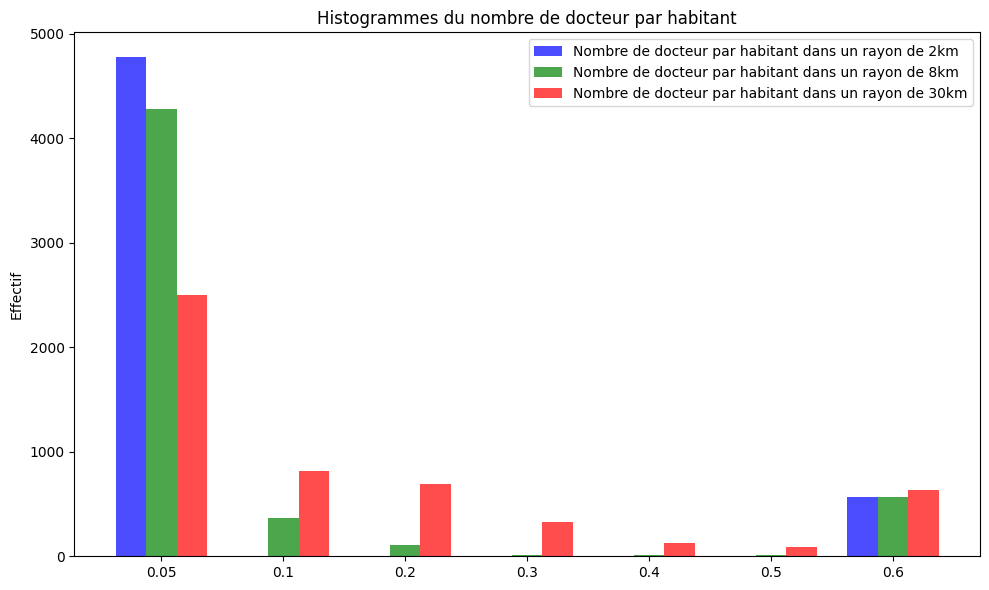

In [129]:
# Exemple de données pour les 3 séries
data1 = dataFF['Nb_doct_2km']
data2 = dataFF['Nb_doct_8km']
data3 = dataFF['Nb_doct_30km']

maxi = dataFF['Nb_doct_30km'].max()
print(maxi)

# Paramètres
bins = [0,0.05,0.1,0.2,0.3,0.4,0.5,0.6]  # Nombre de bacs
width = 0.25  # Largeur des barres

# Calculer les histogrammes
hist1, bin_edges1 = np.histogram(data1, bins=bins)
hist2, bin_edges2 = np.histogram(data2, bins=bins)
hist3, bin_edges3 = np.histogram(data3, bins=bins)

# Définir les positions des barres
x1 = np.arange(len(hist1))  # Positions pour data1
x2 = x1 + width  # Décaler pour data2
x3 = x1 + 2 * width  # Décaler pour data3

# Créer un histogramme pour les 3 ensembles de données
plt.figure(figsize=(10, 6))

# Dessiner les histogrammes avec des positions décalées
plt.bar(x1, hist1, width=width, label='Nombre de docteur par habitant dans un rayon de 2km', color='blue', alpha=0.7)
plt.bar(x2, hist2, width=width, label='Nombre de docteur par habitant dans un rayon de 8km', color='green', alpha=0.7)
plt.bar(x3, hist3, width=width, label='Nombre de docteur par habitant dans un rayon de 30km', color='red', alpha=0.7)

# Ajouter un titre et des légendes
plt.title('Histogrammes du nombre de docteur par habitant')
plt.ylabel('Effectif')
plt.xticks(x1 + width, bins[1:]) 

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.tight_layout()  # Ajuster l'espacement
plt.show()


Text(0.5, 1.0, 'Number of doctors compared to the level of filling of Présentation')

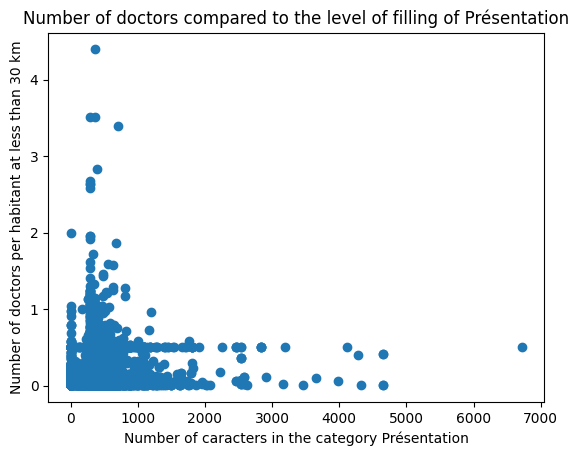

In [130]:
plt.scatter(dataFF['Nb caractères présentation'],dataFF['Nb_doct_30km'])
plt.xlabel('Number of caracters in the category Présentation')
plt.ylabel('Number of doctors per habitant at less than 30 km')
plt.title('Number of doctors compared to the level of filling of Présentation')

Text(0.5, 1.0, 'Number of doctors compared to the number of skills mentioned')

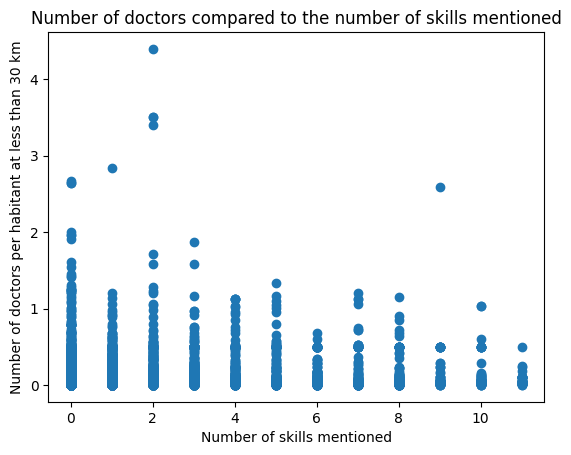

In [131]:
plt.scatter(dataFF['Nb Skills'],dataFF['Nb_doct_30km'])
plt.xlabel('Number of skills mentioned')
plt.ylabel('Number of doctors per habitant at less than 30 km')
plt.title('Number of doctors compared to the number of skills mentioned')

Text(0.5, 1.0, 'Number of doctors compared to the ratio of doctors on Doctolib')

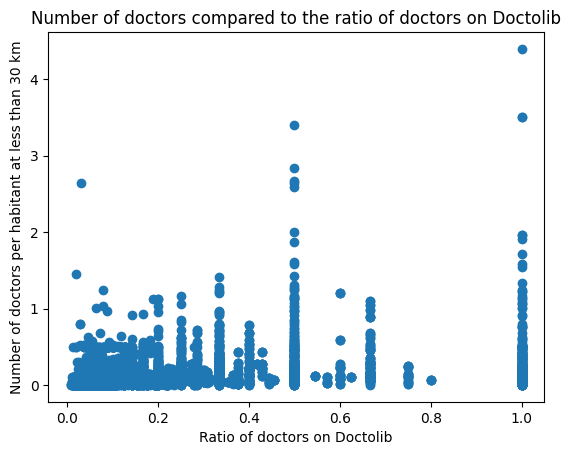

In [132]:
plt.scatter(dataFF['share_Doctolib'],dataFF['Nb_doct_30km'])
plt.xlabel('Ratio of doctors on Doctolib')
plt.ylabel('Number of doctors per habitant at less than 30 km')
plt.title('Number of doctors compared to the ratio of doctors on Doctolib')

Text(0.5, 1.0, 'Number of doctors compared to the ratio of doctors on Doctolib')

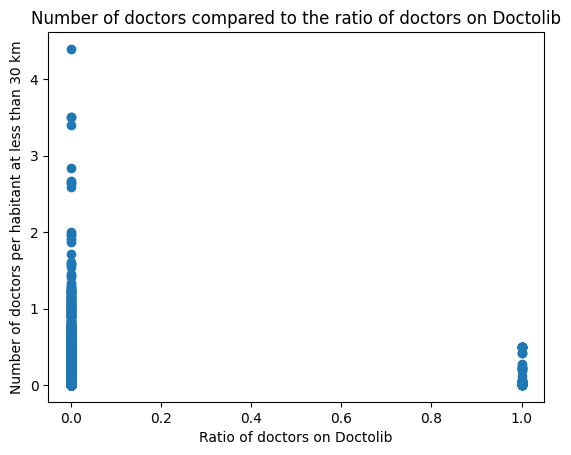

In [133]:
plt.scatter(dataFF['Travaux et publications b'],dataFF['Nb_doct_30km'])
plt.xlabel('Ratio of doctors on Doctolib')
plt.ylabel('Number of doctors per habitant at less than 30 km')
plt.title('Number of doctors compared to the ratio of doctors on Doctolib')

In [134]:
liste_var_descri1=['Nb Skills', 'moyens_paiement',
       'carte_vitale', 'secteur',
       'site',
       'Diplômes nationaux et universitaires b', 'Nb caractères présentation',
       'Autres formations b','Travaux et publications b','Nb langues', 'Expériences b', 'Carac_card_1',
       'Transport', 'Parking', 'Infos', 'Coordonnées', 'Sans RDV', 'Formations b',
       'nb terms card_0', 'nb terms card_3', 'nb terms card_4',
       'nb carac card_0', 'nb carac card_3', 'nb carac card_4']

liste_var_descri2=['Nb_doct_2km','Nb_doct_8km','Nb_doct_30km','Nb_doct_f_2km','Nb_doct_f_8km','Nb_doct_f_30km','Nb_doct_D_2km','Nb_doct_D_8km','Nb_doct_D_30km','Nb_doct_f_D_2km','Nb_doct_f_D_8km','Nb_doct_f_D_30km','APL','Fibre','share_Doctolib']

# Obtenir les statistiques descriptives
stats = dataFF[liste_var_descri].describe()

# Convertir les résultats en LaTeX
stats_transposed = stats.T
latex_table = stats_transposed.to_latex(index=True, float_format="%.2f")

# Afficher le tableau LaTeX
print(latex_table)


\begin{tabular}{lrrrrrrrr}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
Nb Skills & 5354.00 & 1.86 & 2.53 & 0.00 & 0.00 & 1.00 & 3.00 & 11.00 \\
moyens_paiement & 5354.00 & 0.79 & 0.41 & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
carte_vitale & 5354.00 & 0.79 & 0.41 & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
secteur & 5354.00 & 0.82 & 0.45 & 0.00 & 1.00 & 1.00 & 1.00 & 2.00 \\
site & 5354.00 & 0.09 & 0.29 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
Diplômes nationaux et universitaires b & 5354.00 & 0.52 & 0.50 & 0.00 & 0.00 & 1.00 & 1.00 & 1.00 \\
Nb caractères présentation & 5354.00 & 375.20 & 379.79 & 0.00 & 283.00 & 284.00 & 401.00 & 6715.00 \\
Autres formations b & 5354.00 & 0.11 & 0.32 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
Travaux et publications b & 5354.00 & 0.01 & 0.09 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
Nb langues & 5354.00 & 0.95 & 1.08 & 0.00 & 0.00 & 1.00 & 2.00 & 8.00 \\
Expériences b & 5354.00 & 0.05 & 0.23 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
Carac_card_1 & 

/Users/julie/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


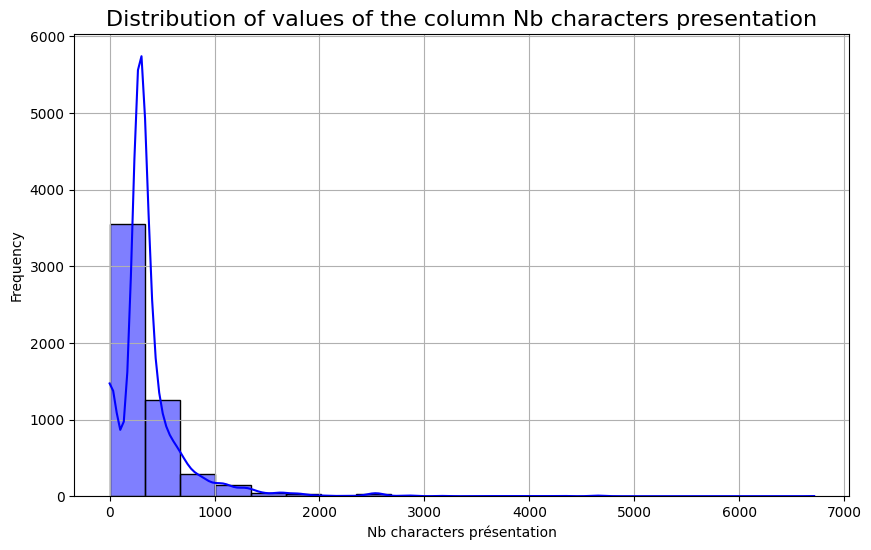

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme et courbe de densité
plt.figure(figsize=(10, 6))
sns.histplot(dataFF['Nb caractères présentation'], kde=True, bins=20, color='blue')

# Titres et légendes
plt.title(f"Distribution of values of the column {'Nb characters presentation'}", fontsize=16)
plt.xlabel('Nb characters présentation')
plt.ylabel("Frequency")
plt.grid(True)

plt.savefig('nb_carac')

# Afficher le graphique
plt.show()

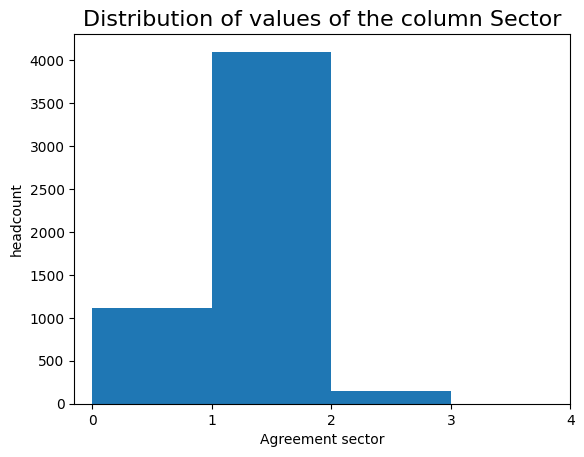

In [142]:
plt.hist(dataFF['secteur'],bins=[0,1,2,3])
plt.xticks([0,1,2,3,4]) 
plt.title(f"Distribution of values of the column {'Sector'}", fontsize=16)
plt.xlabel('Agreement sector')
plt.ylabel("headcount")

plt.savefig('sector')

/Users/julie/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


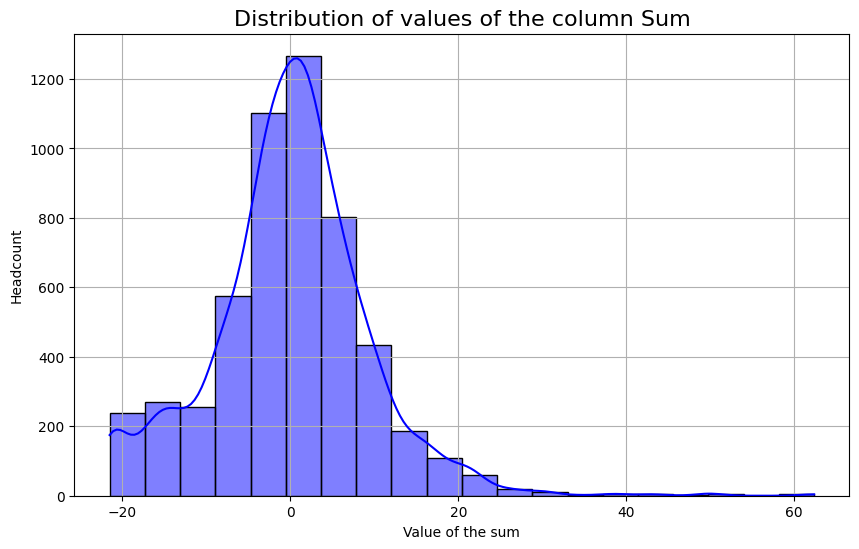

In [143]:
# Histogramme et courbe de densité
plt.figure(figsize=(10, 6))
sns.histplot(dataFF_red_norm_gauss['sum'], kde=True, bins=20, color='blue')

# Titres et légendes
plt.title(f"Distribution of values of the column {'Sum'}", fontsize=16)
plt.xlabel('Value of the sum')
plt.ylabel("Headcount")
plt.grid(True)


plt.savefig('sum')
# Afficher le graphique
plt.show()